In [138]:
import pandas as pd
import numpy as np
import seaborn as sns

In [139]:
loanDf=pd.read_csv("train.csv")
loanDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y


In [140]:
pd.crosstab(loanDf.Gender,loanDf.Loan_Status,normalize='index')


Loan_Status,N,Y
Gender,,
Female,0.321739,0.678261
Male,0.310621,0.689379


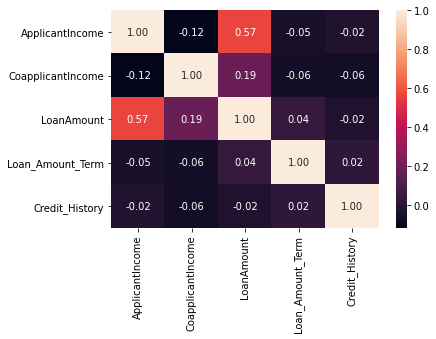

In [141]:
sns.heatmap(loanDf.corr(), annot=True, fmt=".2f")


In [142]:
pd.crosstab(loanDf.Loan_Status,loanDf.Property_Area,normalize='columns')


Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


In [147]:
data=loanDf
cat_vars=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Credit_History']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [155]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,5)
data=data[to_keep].dropna()
data_X=data.drop(['Loan_ID'],axis=1)
data_y=data['Loan_Status']

In [156]:
data_X.isnull().sum()


ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Loan_Status                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Credit_History_0           0
Credit_History_1           0
dtype: int64

In [157]:
data_X.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0', 'Credit_History_1'],
      dtype='object')

In [158]:
data_X.to_csv("trainDatasetClean.csv")